<a href="https://colab.research.google.com/github/Caterpillar-T/MAT-421/blob/main/Homework_6_MAT_421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 6 MAT 421

Kyle Tucker

**3.2 Continuity and Differentiation**

## Limits

Limits are used to define continuity, derivatives, and integrals. We got much practice with these concepts in calculus 1 and 2, and an even more formal understanding in advanced calculus/real analysis. Putting Python to use we can demonstrate how accurately and efficiently finding limits can be when no longer working out solutions by hand. Here is a common limit example one may be tasked with solving in their calculus: $\frac{sin(x)}{x}$.




In [ ]:
import sympy as sp

x = sp.symbols('x')
limit_expr = sp.sin(x) / x
limit_value = sp.limit(limit_expr, x, 0)
print(limit_value)


1


This need not just remain just in the realm of real numbers, Python is efficient even in the complex plane. Looking at the example: $\frac{e^{iz}-1}{z}$.

In [ ]:
import sympy as sp

z = sp.symbols('z', real=False)  # Complex variable
limit_expr = (sp.exp(sp.I * z) - 1) / z
limit_value = sp.limit(limit_expr, z, 0)
print(limit_value)



I


## Derivatives

Formally, the derivative is defined: $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$ and let $x_0 \in D$ be an interior point of $D$. The derivative of $f$ at $x_0$ is $f'(x_0) = \frac{df(x_0)}{dx} = \lim_{h→0}\frac{f(x_0 + h) - f(x_0)}{h}$. This is under the assumption that the limit exists and is in respect to another variable. Much like limits we can use Python to determine the derivative of functions that could be troublesome to derive by hand. Here is an example in the complex plane (the definition much the same as for the real plane, just modified for the intricacies of the complex plane but equivalent) that can be daunting by hand: $f(z) = \frac{e^{iz}}{z}$.

In [ ]:
import sympy as sp

z = sp.symbols('z', real=False)  # Complex variable
f_z = sp.exp(sp.I * z) / z
derivative_f_z = sp.diff(f_z, z)
print(derivative_f_z)


I*exp(I*z)/z - exp(I*z)/z**2


Two large theorems for derivatives are Rolle's Theorem and the Mean Value Theorem. Rolle's Theorem states: letting $f:[a,b] \rightarrow \mathbb{R}$ be a continuous function and assuming its derivatives exists on $(a,b)$. Then if $f(a)=f(b)$, then there exists $a < c < b$ such that $f'(c) = 0$. While maybe not so obvious at first, Rolle's Theorem is what allows us to understand critical points as the derivative at those points is equal to 0.



The Mean Value Theorem states: letting $f:[a,b]→\mathbb{R}$ be a continuous function and assuming that its derivative exists on $(a,b)$. Then There exists $a < c < b$ such that $f(b) = f(a) + (b-a)f'(c)$. The Mean Value Theorem is, as you'd expect, the average value of our rate of change in a function at any given point.

## Taylor's Theorem

This theorem helps to give an approximation of a differentiable function around a given point, expressed as a polynomial. Additionally, it is a means to write a function as a series or infinite sum with derivatives, which is applicable in much of mathematics and analysis. As with our previous sections Python saves us from having to do these more daunting tasks by hand.

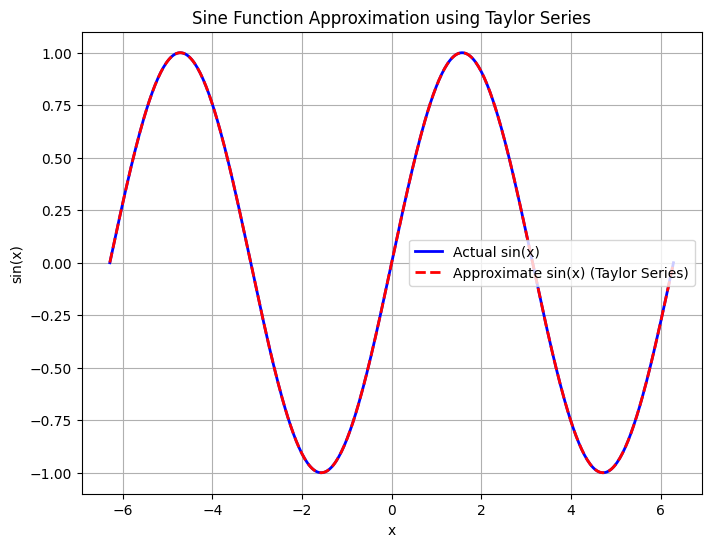

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sin_approximation(x, terms=10):

    sum_series = 0
    for n in range(terms):
        coefficient = (-1)**n
        power_term = x**(2*n + 1)
        factorial_term = math.factorial(2*n + 1)
        sum_series += coefficient * power_term / factorial_term

    return sum_series

# Generate x values from -2*pi to 2*pi for a full sine wave
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Compute the approximation and actual sin values
approx_values = [sin_approximation(x, terms=10) for x in x_values]
actual_values = np.sin(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, actual_values, label='Actual sin(x)', color='b', linewidth=2)
plt.plot(x_values, approx_values, label='Approximate sin(x) (Taylor Series)', color='r', linestyle='--', linewidth=2)
plt.title('Sine Function Approximation using Taylor Series')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


**3.3 Unconstrained Optimization**

A global minimizer is, while obvious in hindsight, is a point in a function where it has reached its lowest value compared to every other potential point and is defined by: let $f: \mathbb{R}^d \rightarrow \mathbb{R}$. The point $x^* \in \mathbb{R}^d$ is a global minimizer of $f$ over $\mathbb{R}^d$ if $f(x) \geq f(x^*)$, for all $x \in \mathbb{R}^d$.

A local minimizer, very similar to a global minimizer, is a point in a function where it has reached its lowest value compared to every other local value and is defined by: let $f: \mathbb{R}^d \rightarrow \mathbb{R}$. The point $x^* \in \mathbb{R}^d$ is a local minimizer of $f$ over $\mathbb{R}^d$ if there is a $δ > 0$ such that $f(x) \geq f(x^*)$, for all $x \in B_{δ}(x^*)$ \ $\{x^*\}$

We can use Python to find both global and local minimizers of a function.

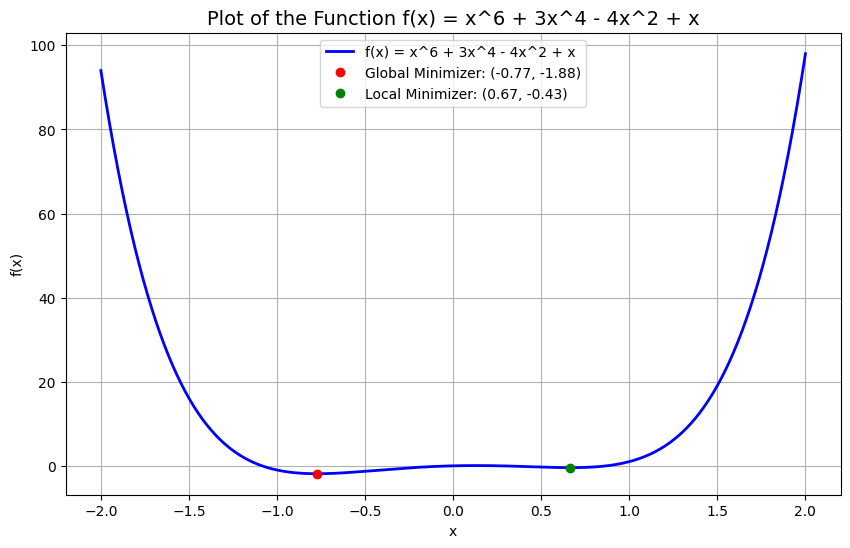

Global Minimum: x = -0.77, f(x) = -1.88
Local Minimum: x = 0.67, f(x) = -0.43


In [ ]:
#Fun example of Python finding the global and local minimizer
#Credit to Aleksandr Cooper for giving me the idea and framework for this example
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function to minimize
def f(x):
    return x**6 + 3*x**4 - 4*x**2 + x

# Generate x values for plotting the function curve
x_values = np.linspace(-2, 2, 500)
y_values = f(x_values)

# Plot the function curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = x^6 + 3x^4 - 4x^2 + x', color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the Function f(x) = x^6 + 3x^4 - 4x^2 + x', fontsize=14)
plt.grid(True)

# Find the global minimum using minimize (starting at x = 0)
result_global = minimize(f, x0=0)
x_global_min = result_global.x[0]
y_global_min = result_global.fun

# Plot the global minimizer (using a red dot)
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min:.2f}, {y_global_min:.2f})')

# Find a local minimum by starting at x = 2
result_local = minimize(f, x0=2)
x_local_min = result_local.x[0]
y_local_min = result_local.fun

# Plot the local minimizer (using a green dot)
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min:.2f}, {y_local_min:.2f})')

# Add a legend, showing the global and local minimizers
plt.legend()

# Show the plot
plt.show()

# Print the results
print(f"Global Minimum: x = {x_global_min:.2f}, f(x) = {y_global_min:.2f}")
print(f"Local Minimum: x = {x_local_min:.2f}, f(x) = {y_local_min:.2f}")
